# Data Scientist Associate Practical Exam

## Company Background
EMO is a manufacturer of motorcycles. The company successfully launched its first electric moped in India in 2019. The product team knows how valuable owner reviews are in making improvements to their mopeds. 

Unfortunately they often get reviews from people who never owned the moped. They don’t want to consider this feedback, so would like to find a way to identify reviews from these people. They have obtained data from other mopeds, where they know if the reviewer owned the moped or not. They think this is equivalent to their own reviews.   


## Customer Question
Your manager has asked you to answer the following:
- Can you predict which reviews come from people who have never owned the moped before?  


## Dataset
The dataset contains reviews about other mopeds from a local website. The data you will use for this analysis can be accessed here: `"data/moped.csv"`

| Column Name      | Criteria                                                                                                                                                                    |
|------------------|-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| Used it for      | Character, the purpose of the electric moped for the user, one of “Commuting”, “Leisure”.                                                                                   |
| Owned for        | Character, duration of ownership of vehicle one of  “<= 6 months”, “> 6 months”, “Never Owned”.  Rows that indicate ownership should be combined into the category “Owned”. |
| Model name       | Character, the name of the electric moped.                                                                                                                                   |
| Visual Appeal    | Numeric, visual appeal rating (on a 5 point scale, replace missing values with 0).                                                                                           |
| Reliability      | Numeric, reliability rating (on a 5 point scale, replace missing values with 0).                                                                                             |
| Extra Feature    | Numeric, extra feature rating (on a 5 point scale, replace missing values with 0).                                                                                         |
| Comfort          | Numeric, comfort rating (on a 5 point scale, replace missing values with 0).                                                                                                 |
| Maintenance cost | Numeric, maintenance cost rating (on a 5 point scale, replace missing values with 0).                                                                                        |
| Value for money  | Numeric, value for money rating (on a 5 point scale, replace missing values with 0).                                                                                         |

# Data Scientist Associate Practical Exam Submission


## Data Validation
The dataset contains **713 rows and 9 columns** with missing values before cleaning. I have validated all the columns against the criteria in the dataset table:

- Used it for: Same as description without missing values, 2 categories.
- Owned for: Same as description without missing values, 3 categories.
- Model name: Same as description without missing values.
- Visual Appeal: Same as description without missing values.
- Reliability: Same as description without missing values.
- Extra Features: 530 missing values, so i replace missing values with 0.
- Comfort: 203 missing values, so i replace missing values with 0.
- Maintenance cost: 537 missing values, so i replace missing values with 0.
- Value for Money: 343 missing values, so i replace missing values with 0.

Onwards, i combined the rows that indicate ownership from the "Owned for" column into "Owned", as asked.
After the data validation, the datased still contains **713 rows and 9 columns.**

### Original Dataset

In [312]:
# Data Validation
# Check all variables in the data against the criteria in the dataset above

import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
sns.set_theme(style="whitegrid")

df = pd.read_csv('data/moped.csv')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 713 entries, 0 to 712
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Used it for       713 non-null    object 
 1   Owned for         713 non-null    object 
 2   Model Name        713 non-null    object 
 3   Visual Appeal     713 non-null    float64
 4   Reliability       713 non-null    float64
 5   Extra Features    183 non-null    float64
 6   Comfort           510 non-null    float64
 7   Maintenance cost  176 non-null    float64
 8   Value for Money   370 non-null    float64
dtypes: float64(6), object(3)
memory usage: 50.3+ KB


### After replacing missing values with 0

In [313]:
df['Extra Features'] = df['Extra Features'].fillna(0)
df['Comfort'] = df['Comfort'].fillna(0)
df['Maintenance cost'] = df['Maintenance cost'].fillna(0)
df['Value for Money'] = df['Value for Money'].fillna(0)


df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 713 entries, 0 to 712
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Used it for       713 non-null    object 
 1   Owned for         713 non-null    object 
 2   Model Name        713 non-null    object 
 3   Visual Appeal     713 non-null    float64
 4   Reliability       713 non-null    float64
 5   Extra Features    713 non-null    float64
 6   Comfort           713 non-null    float64
 7   Maintenance cost  713 non-null    float64
 8   Value for Money   713 non-null    float64
dtypes: float64(6), object(3)
memory usage: 50.3+ KB


### After combining “<= 6 months” and “> 6 months” from the Owned for column into "Owned"

In [314]:
df['Owned for'] = df['Owned for'].replace('<= 6 months', 'Owned')
df['Owned for'] = df['Owned for'].replace('> 6 months', 'Owned')
df['Owned for'].unique()

array(['Never owned', 'Owned'], dtype=object)

## Exploratory Analysis
From **Graph 1 Amount of mops owned**, we can see that most os the reviews come from those who own a mop, about 81% of them. From **Graph 2 and 3 Inspecting the most reviewed models from those who owned and never owned a mop**, we can see that most of the most reviewed models are differend depending on the ownership, so this data will be useful for modeling.

From **Graphs 4-9 Inspecting the relationship between ratings and the target variable (Owned for)**, we can see that most of the people who never owned the mop give a review of 4 or 5, very different from the reviews of those who owned a mop. From **Graph 10 Inspecting the relationship between the usage and the target variable (Owned for)**, it's clear that most people who own a mop said they use it for leasure, while this number is way smaller for those who never owned it. Therefore, we can use the ratings and the usage data as indicators for our prediction.

There were made changes to the data to enable modeling:
- Convert the "Used it for" and "Model Name" categorical variables into numeric variables

### Inspecting the amount of owned mops

Owned          81.065919
Never owned    18.934081
Name: Owned for, dtype: float64


[Text(0.5, 1.0, 'Graph 1 amount of mops owned')]

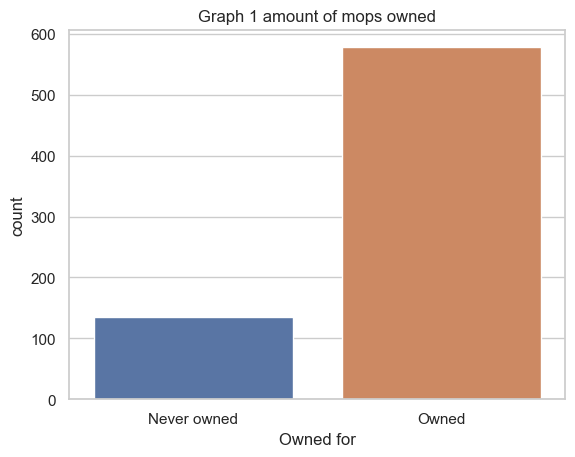

In [315]:
# Exploratory Analysis
# Explore the characteristics of the variables in the data

print(df['Owned for'].value_counts(normalize=True) * 100)
sns.countplot(data=df,x='Owned for').set(title='Graph 1 amount of mops owned')

### Inspecting the most reviewed models from those who owned and never owned a mop

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Tork Kratos'),
  Text(1, 0, 'Revolt RV 400'),
  Text(2, 0, 'Hero Electric Flash'),
  Text(3, 0, 'Okinawa Praise'),
  Text(4, 0, 'OLA S1')])

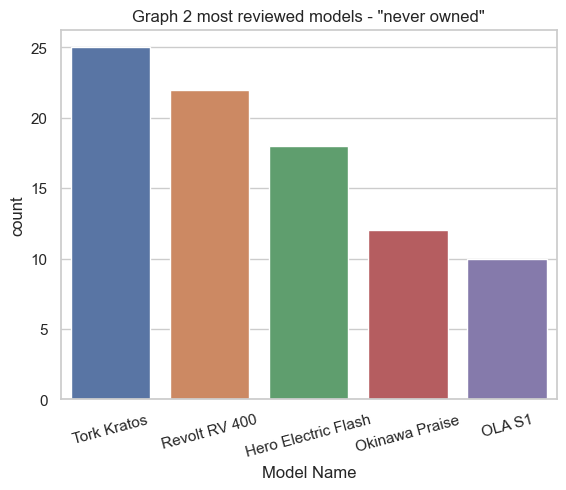

In [316]:
sns.countplot(data=df[df['Owned for'] == 'Never owned'], x = 'Model Name', order=df[df['Owned for'] == 'Never owned']['Model Name'].value_counts().iloc[:5].index).set(title='Graph 2 most reviewed models - "never owned"')
plt.xticks(rotation=15)

### Inspecting the usage of the mops

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Hero Electric Flash'),
  Text(1, 0, 'Hero Electric Optima'),
  Text(2, 0, 'Okinawa Praise'),
  Text(3, 0, 'PURE EV EPluto 7G'),
  Text(4, 0, 'Hero Electric Photon')])

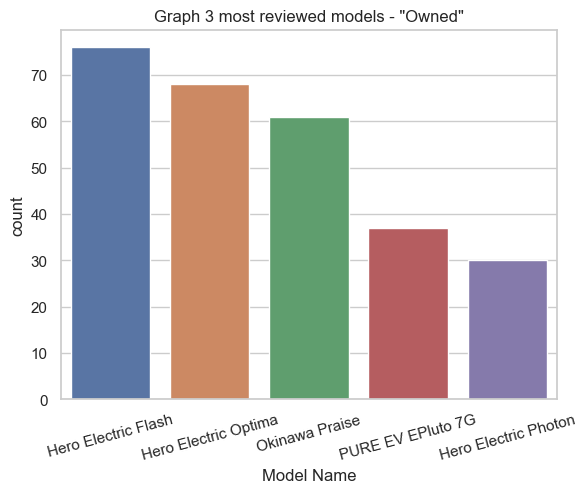

In [317]:
sns.countplot(data=df[df['Owned for'] == 'Owned'], x = 'Model Name', order=df[df['Owned for'] == 'Owned']['Model Name'].value_counts().iloc[:5].index).set(title='Graph 3 most reviewed models - "Owned"')
plt.xticks(rotation=15)

### Inspecting the relationship between ratings and the target variable (Owned for)

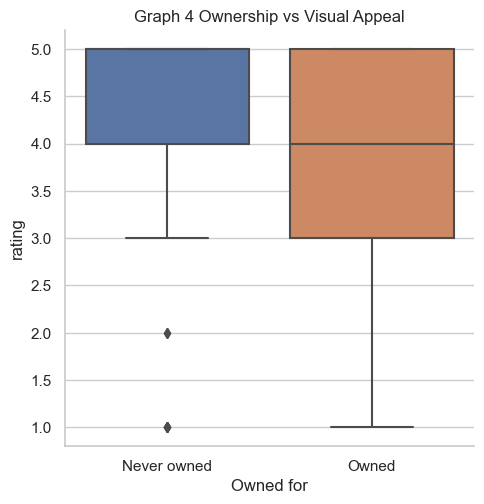

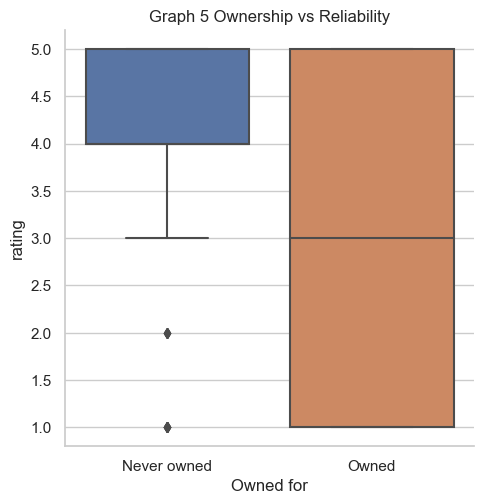

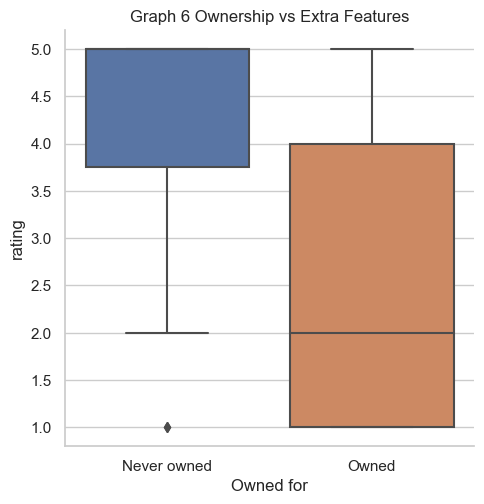

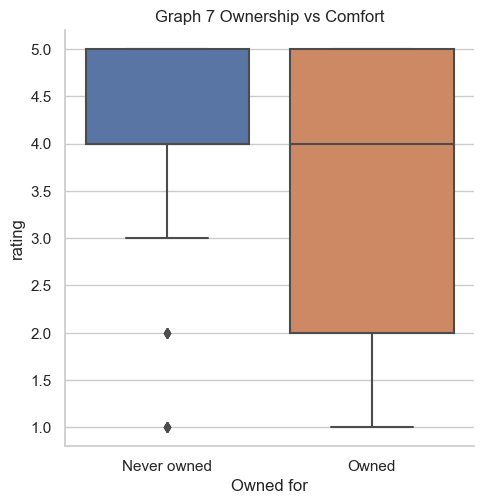

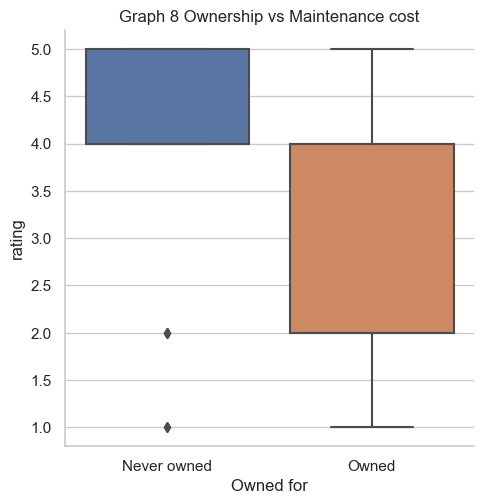

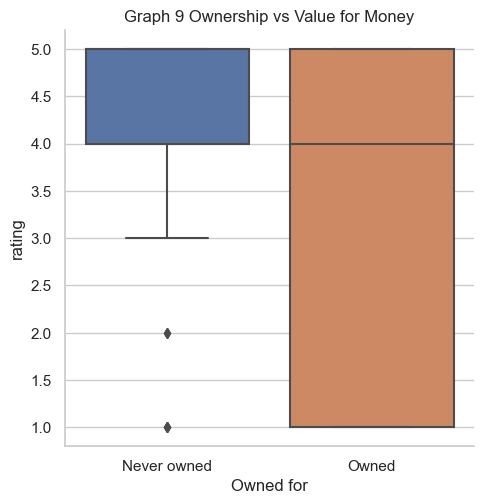

In [318]:
#melts all kinds of ratings into a new table, using the target variable as ID

ratings = df[['Visual Appeal', 'Reliability','Extra Features', 'Comfort', 'Maintenance cost', 'Value for Money', 'Owned for']]
ratings = pd.melt(ratings, id_vars='Owned for', var_name="category", value_name="rating")
ratings = ratings[ratings['rating'] != 0]

sns.catplot(data=ratings[ratings['category'] == 'Visual Appeal'], x='Owned for', y='rating', kind='box').set(title='Graph 4 Ownership vs Visual Appeal')
sns.catplot(data=ratings[ratings['category'] == 'Reliability'], x='Owned for', y='rating', kind='box').set(title='Graph 5 Ownership vs Reliability')
sns.catplot(data=ratings[ratings['category'] == 'Extra Features'], x='Owned for', y='rating', kind='box').set(title='Graph 6 Ownership vs Extra Features')
sns.catplot(data=ratings[ratings['category'] == 'Comfort'], x='Owned for', y='rating', kind='box').set(title='Graph 7 Ownership vs Comfort')
sns.catplot(data=ratings[ratings['category'] == 'Maintenance cost'], x='Owned for', y='rating', kind='box').set(title='Graph 8 Ownership vs Maintenance cost')
sns.catplot(data=ratings[ratings['category'] == 'Value for Money'], x='Owned for', y='rating', kind='box').set(title='Graph 9 Ownership vs Value for Money')

### Inspecting the relationship between the usage and the target variable (Owned for)

[Text(0.5, 1.0, 'Graph 10 ownership vs usage')]

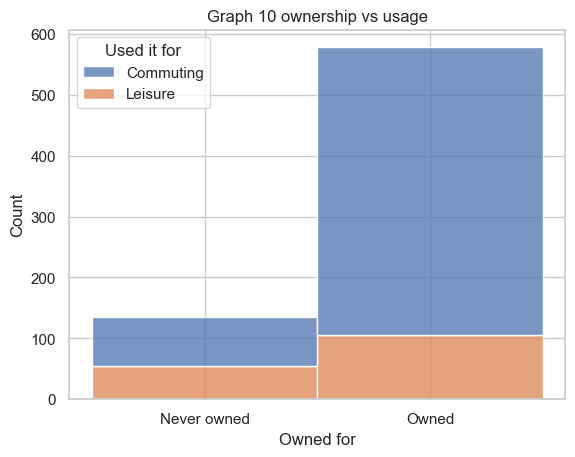

In [319]:
sns.histplot(binwidth=0.5, x="Owned for", hue="Used it for", data=df, stat="count", multiple = "stack").set(title='Graph 10 ownership vs usage')

### changes made to enable modeling

In [320]:
from sklearn import preprocessing
features = df.drop(columns='Owned for')
X = pd.get_dummies(features, columns=['Used it for', 'Model Name'])
df['Owned for'] = df['Owned for'].replace({True:1,False:0})
y = df['Owned for']

## Model Fitting
The task to predict which reviews are from people who own a mop or not is **a binary classification problem** in machine learning. I will use the **Logistic Regression model** as a baseline model because of its efficiency to train and interpret. The comparison model i am choosing is the **Decision Tree model** because it works well with mixed data type.

In [321]:
#import ML models and peformance metrics
from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix 

In [322]:
# Split dataset into 70% training set and 30% test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

### Logistic Regression Model

In [323]:
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
y_pred_log =logreg.predict(X_test)

### Decision Tree Model

In [324]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)
y_pred_clf = clf.predict(X_test)

## Model Evaluation
I chose **accuracy** to evaluate the model, a parameter that focuses on correct predictions of all predictions.

The accuracy of the Logistic Regression model and Decision Tree model is 0.81 and 0.77, meaning the Logistic Regression model predicts more correctly whether the reviews come from people who never owned a mop before.

From this metric, we can conclude that the Logistic Regression model has a higher chance of that prediction being correct.

### Evaluating the Logistic Regression Model

In [325]:
print(classification_report(y_test, y_pred_log))

              precision    recall  f1-score   support

 Never owned       0.76      0.27      0.39        49
       Owned       0.82      0.98      0.89       165

    accuracy                           0.81       214
   macro avg       0.79      0.62      0.64       214
weighted avg       0.81      0.81      0.78       214



### Evaluating the Decision Tree Model

In [326]:
print(classification_report(y_test, y_pred_clf))

              precision    recall  f1-score   support

 Never owned       0.50      0.37      0.42        49
       Owned       0.83      0.89      0.86       165

    accuracy                           0.77       214
   macro avg       0.66      0.63      0.64       214
weighted avg       0.75      0.77      0.76       214



## ✅ When you have finished...
- Publish your Workspace using the option on the left
- Check the published version of your report:
	- Can you see everything you want us to grade?
    - Are all the graphics visible?
- Review grading rubric, have you included everything that will be graded?
- Head back to the [Certification Dashboard](https://app.datacamp.com/certification) to submit your practical exam